# Open exploration

we just have to change the policy levers and save the results unless theres more you guys want to add :)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ema_workbench import Policy, ema_logging, MultiprocessingEvaluator, save_results, load_results
from problem_formulation import get_model_for_problem_formulation

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choosing the problem formulation from 0-5
dike_model, planning_steps = get_model_for_problem_formulation(2) # 5-objectives PF


In [5]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

Policies to be evaluated in this open exploration: 

1. "BAU": business-as-usual, no changes
2. "Only dike": only dike heightening
3. "Only RfR": only room for the river
4. "Final policy debate" : the agreed policy at the end of the final debate

In [7]:
def get_do_nothing_dict():
    return {l.name:0 for l in dike_model.levers}    
    
policies = [Policy("BAU",**dict(get_do_nothing_dict(),**{})),
            Policy("Only dike", **dict(get_do_nothing_dict(), 
                                            **{'A.1_DikeIncrease 0':5,
                                              'A.2_DikeIncrease 0':5,
                                              'A.3_DikeIncrease 0':5,
                                              'A.4_DikeIncrease 0':5,
                                              'A.5_DikeIncrease 0':5})),
            Policy("Only RfR", **dict(get_do_nothing_dict(), 
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1,
                                         '4_RfR 0':1,
                                         '5_RfR 0':1,
                                         '6_RfR 0':1})),
            Policy("Final policy debate", **dict(get_do_nothing_dict(), 
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         'A.3_DikeIncrease 0':3,
                                         'A.5_DikeIncrease 0':3,
                                         'EWS_DaysToThreat':2}))] #test random for now

list_policies = policies
#according to the dike_model_function theres 3 planning steps and a 200-year horizon:
# Step 0: years 0–66
# Step 1: years 67–133
# Step 2: years 134–200
# ex to heighten a dike in step 1 and implement an RfR project in step 2. The model will simulate the outcomes for each step separately.

In [8]:
#running the model through EMA workbench 
n_scenarios = 200
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 200 scenarios * 4 policies * 1 model(s) = 800 experiments
100%|████████████████████████████████████████| 800/800 [00:34<00:00, 23.28it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


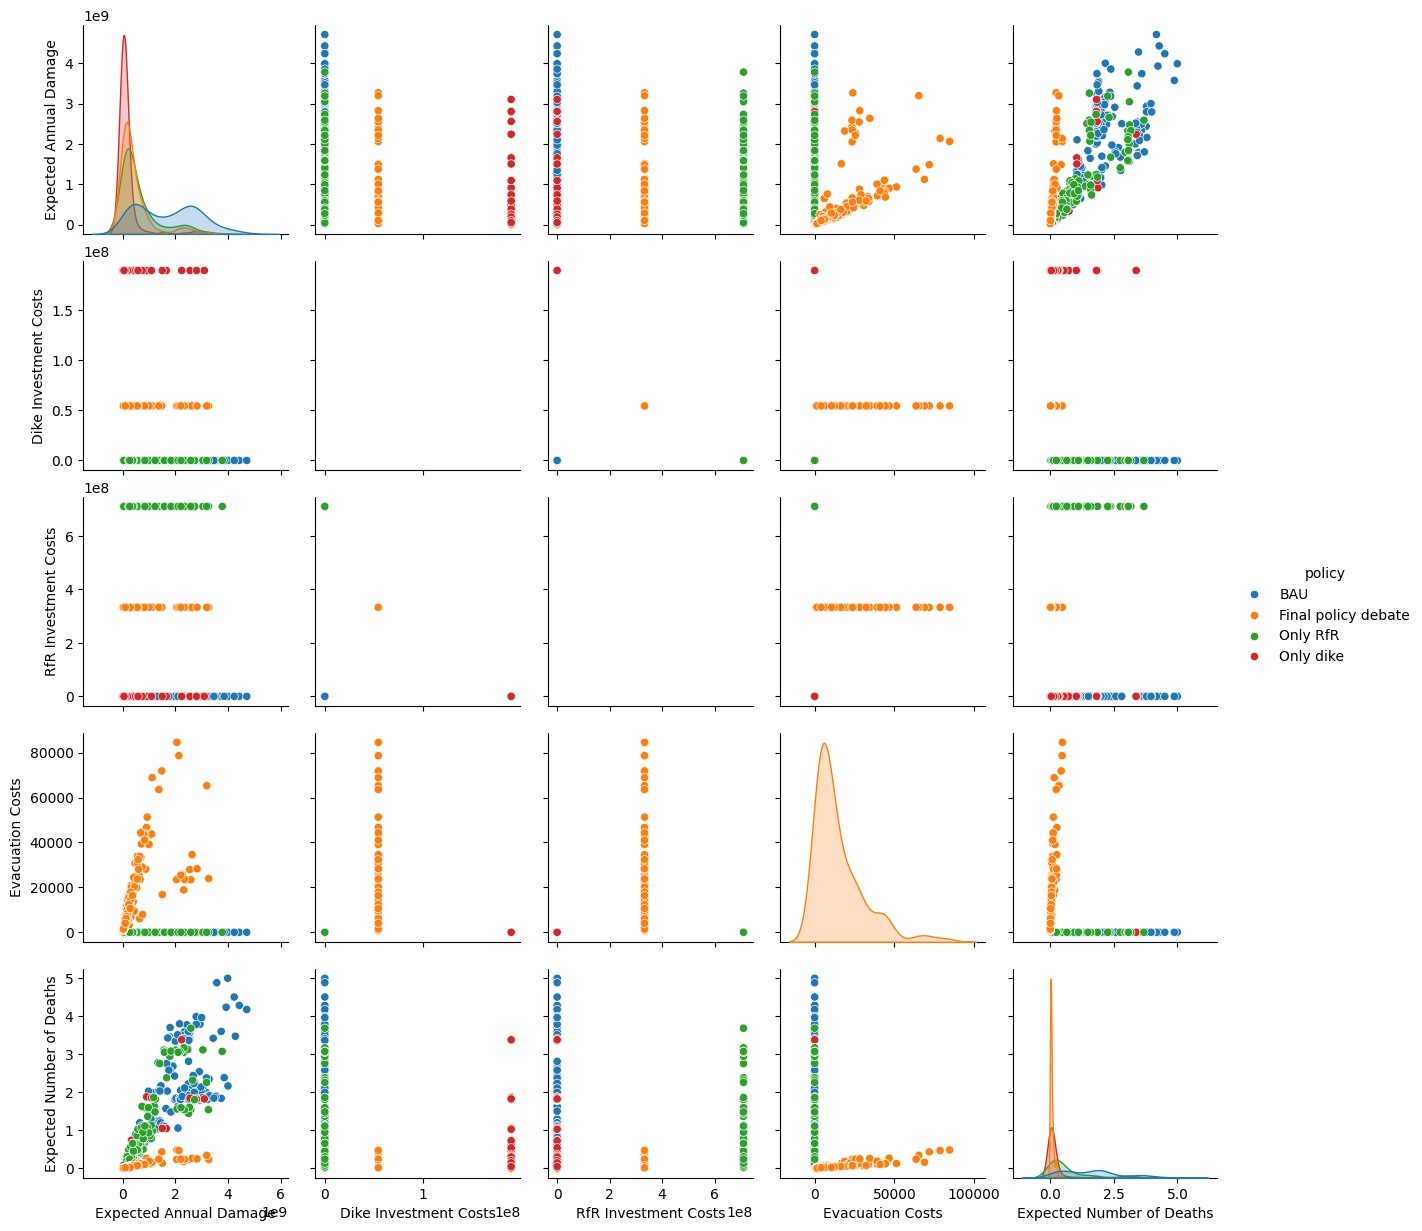

In [9]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
#plot.savefig()
plt.show()